# <center><img src='https://th.bing.com/th/id/OIP.zebRpAIqbDv0MS43zo7ZbQHaE8?pid=ImgDet&rs=1'>

# 1.Importing important libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import precision_score,recall_score,f1_score

import matplotlib.pyplot as plt 
import seaborn as sns


# 2. Reading Data

In [50]:
df=pd.read_csv('C:\\Users\\Dell\\Downloads\\archive\\diabetes_prediction_dataset.csv')

In [51]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [52]:
df.shape

(100000, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [54]:
print(df['smoking_history'].unique())
print(df['gender'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']
['Female' 'Male' 'Other']


In [55]:
 target=df.diabetes.value_counts()

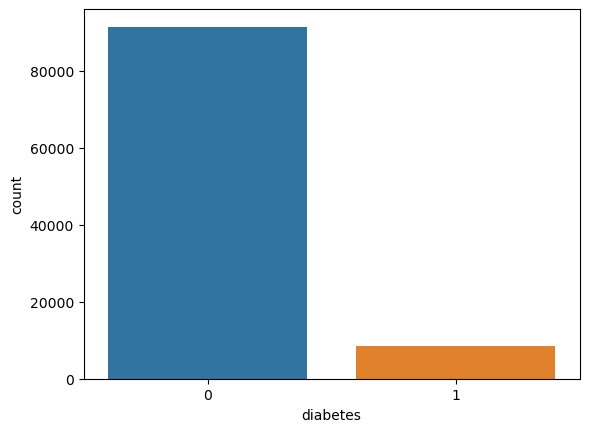

In [56]:
ax=sns.countplot(x='diabetes',data=df)
plt.show()

In [57]:
#making two dataframes
class_0=df[df['diabetes']==0]
class_1=df[df['diabetes']==1]

In [58]:
zero=class_0.sample(n=8500,random_state=2)

In [59]:
zero.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
90088,Male,26.0,0,0,ever,27.68,6.0,140,0
73279,Female,80.0,0,0,No Info,28.29,6.5,100,0
99498,Female,25.0,0,0,never,27.06,6.6,200,0
69122,Female,50.0,0,0,former,23.13,5.7,85,0
95877,Female,68.0,1,0,not current,32.50,4.0,160,0


In [60]:
class_1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


In [61]:
#contatenating tew data frames
frames = [zero,class_1]
dataset = pd.concat(frames)

In [62]:
dataset.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
90088,Male,26.0,0,0,ever,27.68,6.0,140,0
73279,Female,80.0,0,0,No Info,28.29,6.5,100,0


In [63]:
dataset.shape

(17000, 9)

In [12]:
df3=df.replace({'smoking_history':{"never":0,"No Info":1,"current":2,"former":3,"ever":4,"not current":5}})
df4=df3.replace({'gender':{"Male":0,"Female":1,"Other":2}})

In [195]:
df4.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


In [197]:
df4.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [18]:
array1=df4.to_numpy()

In [222]:
np.shape(array1)

(100000, 9)

In [19]:
array_features1=array1[:,0:8]
array_labels1=array1[:,8]


In [20]:
np.shape(array_features1)

(100000, 8)

In [142]:
print(type(array_labels))

<class 'numpy.ndarray'>


# without sampling

# k-Nearest Neighbour

In [81]:
x_train,x_test,y_train,y_test=train_test_split(array_features1,array_labels1,test_size=0.30,random_state=40)


In [82]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)

In [83]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred=knn_classifier.predict(x_test)

In [43]:
print("score:",knn_classifier.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")


score: 0.9515666666666667 

precision  0.8753424657534247 

recall 0.5013730874852883 

f1-score 0.6375654776752308 



# naive

In [85]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [86]:
print("score:",clf.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")



score: 0.9014 

precision  0.44386494647268737 

recall 0.6343664182032169 

f1-score 0.5222868217054263 



# logistic

In [87]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred=lr_model.predict(x_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
print("score:",lr_model.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")


score: 0.9463 

precision  0.7649717514124293 

recall 0.5311887014515496 

f1-score 0.6269969900439916 



# DECISION TREE

In [89]:
from sklearn.tree import DecisionTreeClassifier
treemodel1=DecisionTreeClassifier()
treemodel1.fit(x_train,y_train)
y_pred=treemodel1.predict(x_test)

In [90]:
print("score:",treemodel1.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")


score: 0.9523 

precision  0.712386018237082 

recall 0.7355825814044723 

f1-score 0.7237984944991315 



# UNDER SAMPLING

In [91]:
df1=dataset.replace({'smoking_history':{"never":0,"No Info":1,"current":2,"former":3,"ever":4,"not current":5}})
df2=df1.replace({'gender':{"Male":0,"Female":1,"Other":2}})

In [92]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
90088,0,26.0,0,0,4,27.68,6.0,140,0
73279,1,80.0,0,0,1,28.29,6.5,100,0
99498,1,25.0,0,0,0,27.06,6.6,200,0
69122,1,50.0,0,0,3,23.13,5.7,85,0
95877,1,68.0,1,0,5,32.50,4.0,160,0


In [93]:
array=df2.to_numpy()

In [94]:
array_features=array[:,0:8]
array_labels=array[:,8]


In [95]:
np.shape(array)

(17000, 9)

In [96]:
x_train,x_test,y_train,y_test=train_test_split(array_features,array_labels,test_size=0.30,random_state=40)


# KNN

In [97]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)

In [98]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred=knn_classifier.predict(x_test)

In [100]:
print("score:",knn_classifier.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")


score: 0.8525490196078431 

precision  0.8516228748068007 

recall 0.8569206842923794 

f1-score 0.8542635658914729 



# Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
clf=GaussianNB()

In [103]:
clf.fit(x_train,y_train)

GaussianNB()

In [104]:
y_pred=clf.predict(x_test)

In [105]:
print("score:",clf.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")



score: 0.8290196078431372 

precision  0.884963768115942 

recall 0.7597200622083982 

f1-score 0.8175732217573222 



# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_pred=lr_model.predict(x_test)

In [108]:
print("score:",lr_model.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")


score: 0.8786274509803922 

precision  0.8812963686060132 

recall 0.8775272161741835 

f1-score 0.8794077537502435 



# Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
treemodel1=DecisionTreeClassifier()

In [111]:
treemodel1.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
y_pred=treemodel1.predict(x_test)

In [113]:
print("score:",treemodel1.score(x_test,y_test),"\n")
print("precision ",precision_score(y_test,y_pred),"\n")
print("recall",recall_score(y_test,y_pred),"\n")
print("f1-score",f1_score(y_test,y_pred),"\n")


score: 0.8823529411764706 

precision  0.8806949806949806 

recall 0.8868584758942457 

f1-score 0.8837659821774506 



# Data visualization

# 2.Analyis of classifier without  sampling

In [6]:
x=np.arange(4)

In [7]:
y1=[0.95,0.87,0.51,0.64]
y2=[0.90,0.44,0.64,0.52]
y3=[0.94,0.76,0.53,0.62]
y4=[0.95,0.71,0.73,0.72]
width=0.1

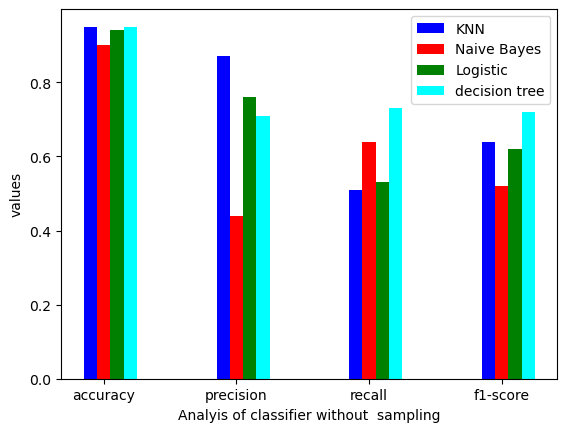

In [8]:
plt.bar(x-0.1,y1,width,color='blue')
plt.bar(x,y2,width,color='red')
plt.bar(x+0.1,y3,width,color='green')
plt.bar(x+0.2,y4,width,color='cyan')

plt.xticks(x,['accuracy','precision','recall','f1-score'])
plt.xlabel("Analyis of classifier without  sampling")
plt.ylabel("values")
plt.legend(["KNN","Naive Bayes","Logistic","decision tree"])
           

# Analysis of algorithm with UNDER SAMPLING

In [9]:
x=np.arange(4)
y1=[0.85,0.85,0.86,0.85]
y2=[0.83,0.88,0.76,0.81]
y3=[0.87,0.88,0.87,0.87]
y4=[0.88,0.88,0.89,0.88]
width=0.1

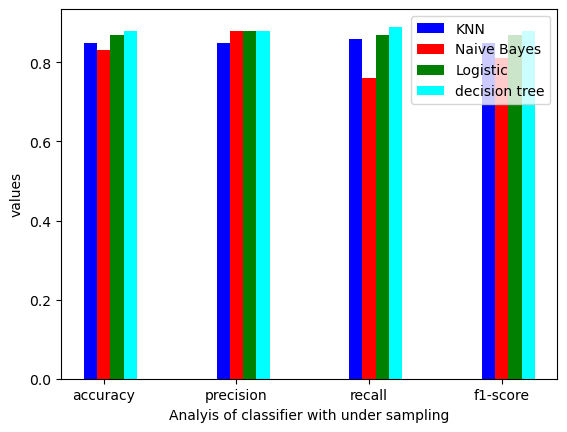

In [11]:
plt.bar(x-0.1,y1,width,color='blue')
plt.bar(x,y2,width,color='red')
plt.bar(x+0.1,y3,width,color='green')
plt.bar(x+0.2,y4,width,color='cyan')

plt.xticks(x,['accuracy','precision','recall','f1-score'])
plt.xlabel("Analyis of classifier with under sampling")
plt.ylabel("values")
plt.legend(["KNN","Naive Bayes","Logistic","decision tree"])
           